In [2]:
#import the base libraries for the EDA
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [62]:
#load the csv dataset into the pandas dataframe(data)
data = pd.read_csv('./creditcard.csv')

In [25]:
#More information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Go through the dataset once and check all the features once
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#check if there is any missing value in the dataset columns
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Determine number of fraud cases in the dataset
# Valid transaction if Class = 0 and Fraud if Class = 1

valid = len(data[data['Class'] == 0])
fraud = len(data[data['Class'] == 1])

print('Valid transactions :'  , valid ) 
print('Fraud transactions :'  , fraud )

Valid transactions : 284315
Fraud transactions : 492


In [14]:
#Amount details for the valid transaction class
print("=========VALID=========")
v_info = data[data['Class'] == 0]
v_info.Amount.describe()

=========VALID=========


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
#Amount details for the fraud transaction class
print("=========FRAUD=========")
v_info = data[data['Class'] == 1]
v_info.Amount.describe()

=========FRAUD=========


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0, 0.5, 'Frequency')

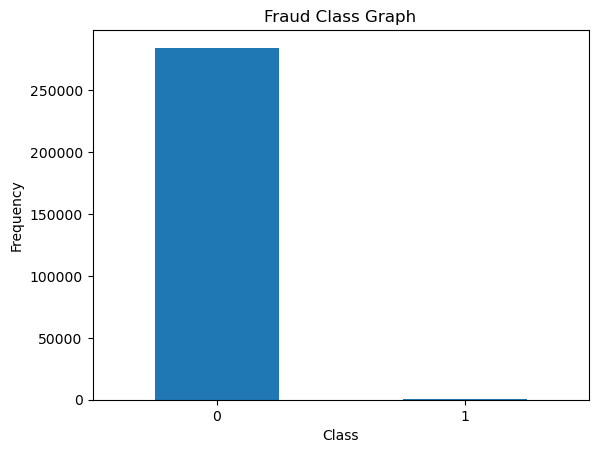

In [20]:
# visualing both the classes(Fraud and Valid) through bargraph

show_classes = pd.value_counts(data['Class'], sort = True ).sort_index()
show_classes.plot(kind = 'bar',rot = 0  )

plt.title ( "Fraud Class Graph" )
plt.xlabel( "Class" )
plt.ylabel( "Frequency" )

##### Finding:
As we can see the the dataset is highly imbalanced.Most of the transactions are Valid. We cannot use the same dataframe as the model can assume that most of the transactions are not fraud. 

In [39]:
from sklearn.utils import resample

# Separate majority and minority class instances
majority_class = data[data['Class'] == 0]  # Valid transactions
minority_class = data[data['Class'] == 1]  # Fraud transactions

# Undersample the majority class
undersampled_majority_class = resample(majority_class,
                                       replace=False,
                                       n_samples=len(minority_class),
                                       random_state=42)

# Combine the minority class DataFrame with the undersampled majority class DataFrame
undersampled_data = pd.concat([undersampled_majority_class, minority_class])

# Shuffle the undersampled DataFrame
data = undersampled_data.sample(frac=1, random_state=42)


In [40]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00,1
1686,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,43.80,0
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1
128360,78685.0,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,1.30,0
20746,31244.0,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,18.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35123,37976.0,-2.045484,-0.603428,-0.386028,-3.278179,0.840525,3.868593,0.785816,1.183953,1.009150,...,0.147327,0.243740,-0.357663,1.052686,1.112681,-0.749815,-0.005714,-0.173156,350.00,0
84735,60439.0,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,...,-0.023137,0.118389,-0.270359,-0.393864,-0.062653,0.510585,0.094780,0.126249,12.95,0
189587,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90,1
175852,122517.0,1.554783,-1.059409,-0.658570,0.112271,-0.724124,-0.288185,-0.241162,-0.044019,0.879991,...,0.021068,-0.344273,0.131801,-0.336523,-0.569150,-0.302588,-0.035571,-0.008578,229.88,0


##### Scaling of features AMOUNT and TIME

In [41]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = data.drop(['Amount', 'Time'], axis=1).assign(scaled_amount=sc.fit_transform(data['Amount'].values.reshape(-1, 1)),
                                                scaled_time=sc.fit_transform(data['Time'].values.reshape(-1, 1)))

In [42]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,...,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,1,-0.456932,-0.972886
1686,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,1.346832,...,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,0,-0.259325,-1.805222
111690,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,-4.684233,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,1,0.620884,-0.324654
128360,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,-0.774565,...,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,0,-0.451067,-0.192105
20746,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,0.065573,...,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,0,-0.373197,-1.181132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35123,-2.045484,-0.603428,-0.386028,-3.278179,0.840525,3.868593,0.785816,1.183953,1.009150,-2.479646,...,0.243740,-0.357663,1.052686,1.112681,-0.749815,-0.005714,-0.173156,0,1.122121,-1.040786
84735,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,-0.664655,...,0.118389,-0.270359,-0.393864,-0.062653,0.510585,0.094780,0.126249,0,-0.398507,-0.572489
189587,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,-4.565260,...,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,1,-0.150596,0.845809
175852,1.554783,-1.059409,-0.658570,0.112271,-0.724124,-0.288185,-0.241162,-0.044019,0.879991,-0.121252,...,-0.344273,0.131801,-0.336523,-0.569150,-0.302588,-0.035571,-0.008578,0,0.580190,0.721683


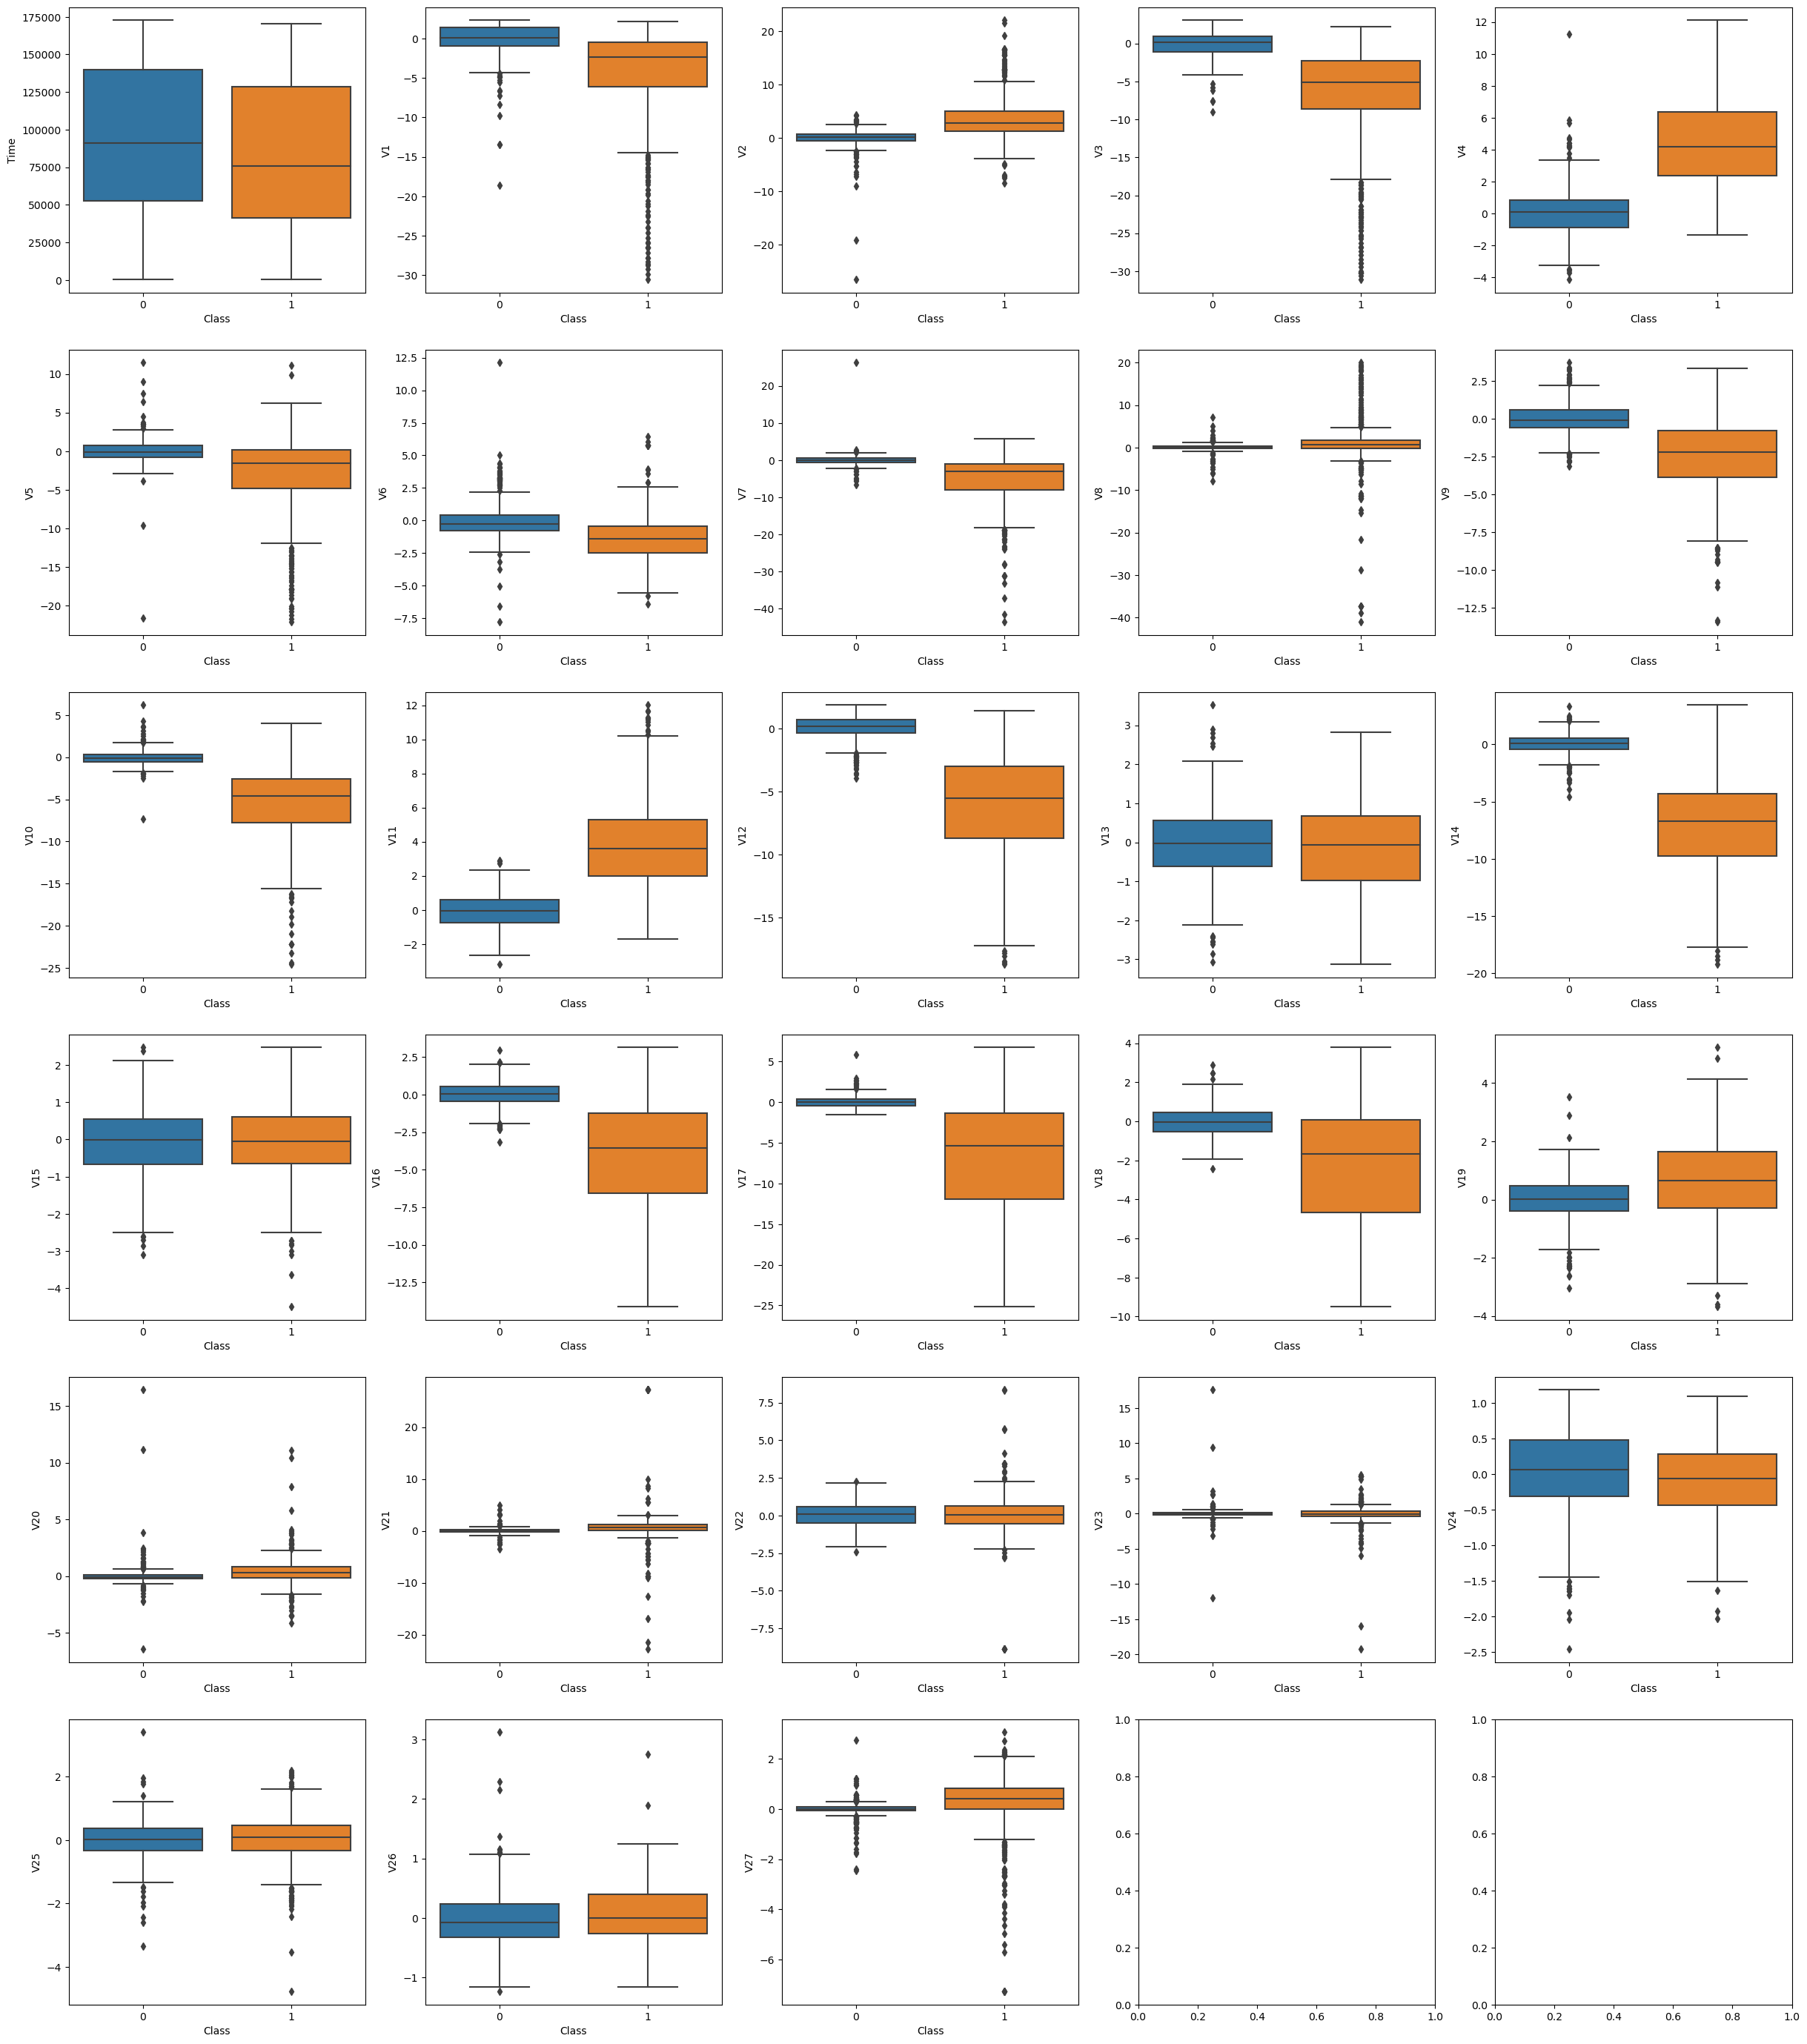

In [65]:
#robust dunntion for displaying the outliers
def plot_boxplots(data, features, class_var, ncols, nrows, figsize=(30, 35)):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    for i, feature in enumerate(features):
        row = i // ncols
        col = i % ncols
        sns.boxplot(x=class_var, y=feature, data=data, ax=axes[row][col])
    plt.show()
features = list(data.columns[:28])
plot_boxplots(new_df, features, 'Class', 5 , 6)

In [64]:
def get_thr_min_max(df, var):
    
    p25 = df[var].quantile(0.25)
    p75 = df[var].quantile(0.75)
    iqr = p75-p25

    thr_min = p25-1.5*iqr
    thr_max = p75+1.5*iqr
    
    return thr_min, thr_max

def outlier_treatment_iqr(val,thr_min,thr_max):
    
    if val>thr_max:
        return thr_max

    elif val<thr_min:
        return thr_min
    
    else:
        return val
for i in features:
    thr_min, thr_max = get_thr_min_max(df=data, var= i)
    data[i] = data[i].apply(lambda x: outlier_treatment_iqr(x, thr_min, thr_max))

In [66]:
X= data.drop(['Class'], axis=1)
y= data['Class']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [68]:
from sklearn.metrics import (confusion_matrix, roc_curve, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score)

In [95]:
model_list = []
precision_list = []
recall_list = []
f1_list = []

model_list.clear()
precision_list.clear()
recall_list.clear()
f1_list.clear()

### Random Forest Classifier

In [96]:

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier( random_state = 100 ) 
rfc.fit(X_train, y_train) 
Y_pred=rfc.predict(X_test) 

model_list.append('rfc')
precision_list.append(precision_score(y_test, Y_pred))
recall_list.append(recall_score(y_test, Y_pred))
f1_list.append(f1_score(y_test, Y_pred))

print("Model Accuracy:", accuracy_score(y_test, Y_pred))
print("Model Precision:", precision_score(y_test, Y_pred))
print("Model Recall:", recall_score(y_test, Y_pred))
print("Model F1-Score:", f1_score(y_test, Y_pred))

print(classification_report(y_test,Y_pred))

Model Accuracy: 0.9994382219725431
Model Precision: 0.8852459016393442
Model Recall: 0.7605633802816901
Model F1-Score: 0.8181818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.89      0.76      0.82       142

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### LOGISTIC REGRESSION MODEL

In [97]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 100)
logreg.fit(X_train, y_train)
Y_pred1 = logreg.predict(X_test)

model_list.append('logreg')
precision_list.append(precision_score(y_test, Y_pred))
recall_list.append(recall_score(y_test, Y_pred))
f1_list.append(f1_score(y_test, Y_pred))

print("Model Accuracy:", accuracy_score(y_test, Y_pred1))
print("Model Precision:",precision_score(y_test, Y_pred1))
print("Model Recall:", recall_score(y_test, Y_pred1))
print("Model F1-Score:",f1_score(y_test, Y_pred1), '\n')

print(classification_report(y_test,Y_pred1))

Model Accuracy: 0.9988764439450862
Model Precision: 0.6493506493506493
Model Recall: 0.704225352112676
Model F1-Score: 0.6756756756756757 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.65      0.70      0.68       142

    accuracy                           1.00     85443
   macro avg       0.82      0.85      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### NAIVE BAYES CLASSIFIER

In [98]:
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()
NB.fit(X_train,y_train)
Y_pred2 = NB.predict(X_test)

model_list.append('NB')
precision_list.append(precision_score(y_test, Y_pred2))
recall_list.append(recall_score(y_test, Y_pred2))
f1_list.append(f1_score(y_test, Y_pred2))

print("Model Accuracy:", accuracy_score(y_test, Y_pred2))
print("Model Precision:",precision_score(y_test, Y_pred2))
print("Model Recall:", recall_score(y_test, Y_pred2))
print("Model F1-Score:", f1_score(y_test, Y_pred2), '\n')

print(classification_report(y_test,Y_pred2))

Model Accuracy: 0.9989700736163291
Model Precision: 0.7410714285714286
Model Recall: 0.5845070422535211
Model F1-Score: 0.6535433070866141 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.58      0.65       142

    accuracy                           1.00     85443
   macro avg       0.87      0.79      0.83     85443
weighted avg       1.00      1.00      1.00     85443



### SVM CLASSIFIER MODEL

In [99]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
Y_pred3 = svm_clf.predict(X_test)


model_list.append('svm_clf')
precision_list.append(precision_score(y_test, Y_pred3))
recall_list.append(recall_score(y_test, Y_pred3))
f1_list.append(f1_score(y_test, Y_pred3))

print("Model Accuracy:", accuracy_score(y_test, Y_pred3))
print("Model Precision:", precision_score(y_test, Y_pred3))
print("Model Recall:", recall_score(y_test,Y_pred3))
print("Model F1-Score:", f1_score(y_test, Y_pred3 ), '\n')

print(classification_report(y_test,Y_pred3))

Model Accuracy: 0.99833807333544
Model Precision: 0.0
Model Recall: 0.0
Model F1-Score: 0.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.00      0.00      0.00       142

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [102]:
print(f1_list)

[0.8181818181818182, 0.8181818181818182, 0.6535433070866141, 0.0]


In [101]:
best_model_index = f1_list.index(max(f1_list))
best_model = model_list[best_model_index]
best_precision = precision_list[best_model_index]
best_recall = recall_list[best_model_index]
best_f1_score = f1_list[best_model_index]
print( best_model, best_precision, best_recall, best_f1_score)

rfc 0.8852459016393442 0.7605633802816901 0.8181818181818182


In [ ]:
from azureml.core import Run
import joblib

run = Run.get_context()

run.log("Parameter",best_model.get_params())

run.log("Precision",best_precision)
run.log("Recall",best_recall)
run.log("F1 Score",best_f1_score)

joblib.dump(best_model, "finalmodel.pkl")

In [104]:
pip install azureml-sdk

Note: you may need to restart the kernel to use updated packages.


In [105]:
resource_name = "rg_project_ml"
workspace_name = "w_project_ml"
subscriptionID = "f2813f24-bf98-421d-b7cb-554e68274436" # Please enter your subscription id here
aml_compute_target = "project_ml" #ALL SMALL LETTER, NO underscore, 16ws long only.
experiment_name= 'credit_card_project'